(testing:exercise)=
# Getting started with MetPy

Before we get started, we test the learning environment and the most important packages needed to run the notebooks. This is not so much a continuous coherent exercise as individual examples based on the different packages.This exercise is neither an introduction to Python nor extensive tutorials for the individual packages. I advise you, if you have little or no experience with the packages, to work through the relevant tutorial on the websites. All packages offer very good and extensive tutorials. Most of the functions presented here have been taken from these websites.

<div class="alert alert-block alert-success">
<b>Learning objectives:</b><br>
<ul>
 <li>Getting to know the learning environment</li>
 <li>Testing the MetPy package</li>
 <li>Very brief overview of the function of the packages</li>
</ul>  
</div>

<div class="alert alert-block alert-info">
<b>How to proceed:</b><br>
<ul>
 <li>Testing MetPy</li>
</ul>  
</div>

MetPy is a collection of tools in Python for reading, visualizing, and performing calculations with weather data. One of the most significant differences in syntax for MetPy, compared to other Python libraries, is the frequent requirement of units to be attached to arrays before being passed to MetPy functions. There are very few exceptions to this, and you’ll usually be safer to always use units whenever applicable to make sure that your analyses are done correctly. Once you get used to the units syntax, it becomes very handy, as you never have to worry about unit conversion for any calculation. MetPy does it for you!

Let's load the MetPy and numpy library


In [16]:
# Load the pandas package
import numpy as np
from metpy.units import units

Please note, we have loaded only the units module here. We can assign a unit to an array by

In [4]:
# Attach the unit meters to the distance array
distance = np.arange(1, 5) * units.meters

Similarly, we can attach create a time array

In [6]:
# This is another way to attach units to an array 
time = units.Quantity(np.arange(2, 10, 2), 'sec')

Now, we can simply do unit-aware calculations

In [7]:
distance/time

Magnitude,[0.5 0.5 0.5 0.5]
Units,meter/second


## MetPy with xarray

In [8]:
import xarray as xr
import metpy
from metpy.cbook import get_test_data

In [22]:
ds = xr.open_dataset(get_test_data('narr_example.nc', as_file_obj = False))
ds

<xarray.Dataset>
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+03 -3.054e+03 ... 678.9 711.4
  * x                    (x) float64 -3.977e+03 -3.945e+03 ... 5.47e+03
Data variables:
    Temperature          (time, isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (time, isobaric, y, x) float32 ...
    v_wind               (time, isobaric, y, x) float32 ...
    Geopotential_height  (time, isobaric, y, x) float32 ...
    Specific_humidity    (time, isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [23]:
ds = ds.metpy.parse_cf()
ds

<xarray.Dataset>
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
    metpy_crs            object Projection: lambert_conformal_conic
Data variables:
    Temperature          (time, isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (time, isobaric, y, x) float32 ...
    v_wind               (time, isobaric, y, x) float32 ...
    Geopotential_height  (time, isobaric, y, x) float32 ...
    Specific_humidity    (time, isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [24]:
# Grab lat/lon values from file as unit arrays
lats = ds.lat.metpy.unit_array
lons = ds.lon.metpy.unit_array

# Get the valid time
vtime = ds.Temperature.metpy.time[0]

# Get the 700-hPa heights without manually identifying the vertical coordinate
hght_700 = ds.Geopotential_height.metpy.sel(vertical=700 * units.hPa,
                                                 time=vtime)

In [26]:
# Cartopy CRS, useful for plotting
hght_700.metpy.cartopy_crs

<Derived Projected CRS: +proj=lcc +ellps=sphere +a=6367470.21484375 +b=636 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (1SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

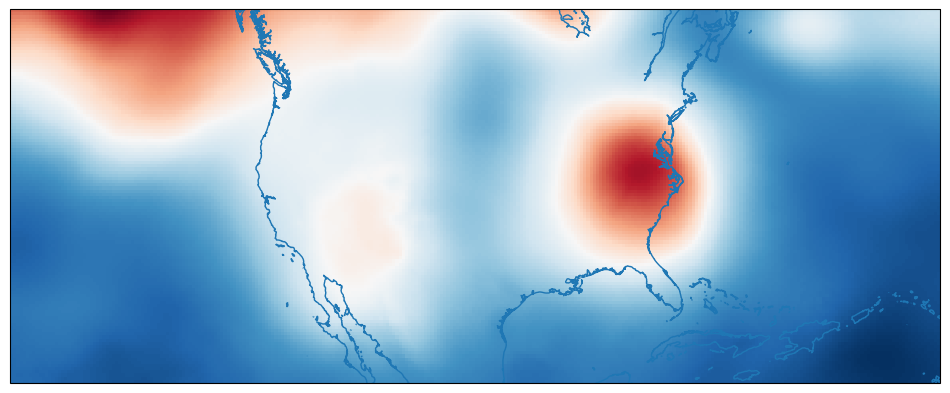

In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=hght_700.metpy.cartopy_crs)
x = ds.x
y = ds.y

ax.imshow(hght_700, extent=(x.min(), x.max(), y.min(), y.max()),
          cmap='RdBu', origin='lower' if y[0] < y[-1] else 'upper')
ax.coastlines(color='tab:blue', resolution='10m')

plt.show()

## Calculations

In [48]:
import numpy as np
from metpy.units import units
import metpy.calc as mpcalc

In [49]:
temperature = [20] * units.degC
rel_humidity  = [50] * units.percent
print(mpcalc.dewpoint_from_relative_humidity(temperature, rel_humidity))

[9.270085985370088] degree_Celsius


In [54]:
speed = np.array([5, 10, 15, 20]) * units.knots
direction = np.array([0, 90, 180, 270]) * units.degrees
u, v = mpcalc.wind_components(speed, direction)
print(u, v)


[-0.0 -10.0 -1.83697019872103e-15 20.0] knot [-5.0 -6.123233995736766e-16 15.0 3.673940397442059e-15] knot


<div class="alert alert-block alert-info">
<b>Reminder</b> 
<ul>
    <li>Import the package, aka <b>import pandas as pd</b>
    <li>A table of data is stored as a pandas DataFrame
    <li>Each column in a DataFrame is a Series
    <li>You can do things by applying a method to a DataFrame or Series
</ul> 
</div>

<div class="alert alert-block alert-warning">
<b>Homework:</b> Check out the pandas <a href="https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html">tutorial</a> and get familiar with the syntax.
</div>